In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import scipy.stats as stats

In [2]:
data1 = pd.read_csv("final_stress_dataset.csv")

In [ ]:
np.median(data1['psafe'])


np.float64(4.502155172413793)

In [ ]:
np.mean(data1['stress'])

np.float64(4.282327586206897)

In [34]:
np.mean(data1['stress'])

np.float64(4.255)

In [ ]:
data1[data1['mode'] == 'car']['stress'].describe() #car mean value=4.49

count    116.000000
mean       4.551724
std        1.741288
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: stress, dtype: float64

In [6]:
data1[data1['mode'] == 'ebike']['stress'].describe() #e-bike mean value=3.94

count    116.000000
mean       3.982759
std        1.888099
min        1.000000
25%        3.000000
50%        4.000000
75%        5.250000
max        7.000000
Name: stress, dtype: float64

In [7]:
data1[data1['mode'] == 'escooter']['stress'].describe() #e-scooter mean value= 3.57

count    116.000000
mean       3.568966
std        1.970319
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: stress, dtype: float64

In [8]:
data1[data1['mode'] == 'walk']['stress'].describe() #walking mean value=5.02

count    116.000000
mean       5.025862
std        1.890301
min        1.000000
25%        4.000000
50%        5.500000
75%        7.000000
max        7.000000
Name: stress, dtype: float64

In [10]:
#Female
Female_psafe = data1[data1['gender'] == 0]['stress'].describe()
#Male
Male_psafe = data1[data1['gender'] == 1]['stress'].describe()
print(pd.DataFrame({
    'Female': Female_psafe,
    'Male': Male_psafe
}))

           Female        Male
count  200.000000  200.000000
mean     4.140000    4.370000
std      1.984969    1.902947
min      1.000000    1.000000
25%      2.750000    3.000000
50%      4.000000    4.500000
75%      6.000000    6.000000
max      7.000000    7.000000


In [11]:
male_car = data1[(data1['mode'] == 'car') & (data1['gender'] == 0)]['stress'].describe()
female_car = data1[(data1['mode'] == 'car') & (data1['gender'] == 1)]['stress'].describe()
print(pd.DataFrame({
    'Female Car': female_car,
    'Male Car': male_car
}))

       Female Car   Male Car
count   50.000000  50.000000
mean     4.700000   4.280000
std      1.631951   1.852081
min      1.000000   1.000000
25%      3.000000   3.000000
50%      5.000000   5.000000
75%      6.000000   5.000000
max      7.000000   7.000000


In [12]:
male_ebike = data1[(data1['mode'] == 'ebike') & (data1['gender'] == 0)]['stress'].describe()
female_ebike = data1[(data1['mode'] == 'ebike') & (data1['gender'] == 1)]['stress'].describe()
print(pd.DataFrame({
    'Female E-bike': female_ebike,
    'Male E-bike': male_ebike
}))

       Female E-bike  Male E-bike
count      50.000000    50.000000
mean        3.960000     3.920000
std         1.916204     1.759406
min         1.000000     1.000000
25%         3.000000     3.000000
50%         4.000000     4.000000
75%         5.000000     5.000000
max         7.000000     7.000000


In [13]:
male_escooter = data1[(data1['mode'] == 'escooter') & (data1['gender'] == 0)]['stress'].describe()
female_escooter = data1[(data1['mode'] == 'escooter') & (data1['gender'] == 1)]['stress'].describe()
print(pd.DataFrame({
    'Female E-scooter': female_escooter,
    'Male E-scooter': male_escooter
}))


       Female E-scooter  Male E-scooter
count         50.000000       50.000000
mean           3.460000        3.680000
std            1.918864        2.084344
min            1.000000        1.000000
25%            2.000000        2.000000
50%            3.000000        3.500000
75%            5.000000        6.000000
max            7.000000        7.000000


In [14]:
male_walk = data1[(data1['mode'] == 'walk') & (data1['gender'] == 0)]['stress'].describe()
female_walk = data1[(data1['mode'] == 'walk') & (data1['gender'] == 1)]['stress'].describe()
print(pd.DataFrame({
    'Female Walk': female_walk,
    'Male Walk': male_walk
}))


       Female Walk  Male Walk
count     50.00000  50.000000
mean       5.36000   4.680000
std        1.60051   2.132738
min        1.00000   1.000000
25%        4.00000   3.000000
50%        6.00000   5.000000
75%        7.00000   7.000000
max        7.00000   7.000000


In [15]:
owns_license = data1[data1['license_own'] == 1]['stress'].describe()
not_owns_license = data1[data1['license_own'] == 0]['stress'].describe()
print(pd.DataFrame({
    'Has a License': owns_license,
    'Does not have License': not_owns_license
}))

       Has a License  Does not have License
count     248.000000             152.000000
mean        4.346774               4.105263
std         1.938505               1.953628
min         1.000000               1.000000
25%         3.000000               3.000000
50%         5.000000               4.000000
75%         6.000000               6.000000
max         7.000000               7.000000


In [16]:
owns_license = data1[(data1['mode'] == 'car') & (data1['license_own'] == 1)]['stress'].describe()
not_owns_license = data1[(data1['mode'] == 'car') & (data1['license_own'] == 0)]['stress'].describe()
print(pd.DataFrame({
    'Has a License': owns_license,
    'Does not have License': not_owns_license
}))

       Has a License  Does not have License
count      62.000000              38.000000
mean        4.596774               4.315789
std         1.885751               1.508629
min         1.000000               1.000000
25%         3.000000               3.000000
50%         5.000000               4.000000
75%         6.000000               5.000000
max         7.000000               7.000000


In [ ]:
type0 = data1[data1['type'] == 3]['stress'].describe() 
type1 = data1[data1['type'] == 1]['stress'].describe() 
type2 = data1[data1['type'] == 2]['stress'].describe() 
type3 = data1[data1['type'] == 4]['stress'].describe() 
print(pd.DataFrame({
    'Type 0': type0,
    'Type 1': type1,
    'Type 2': type2,
    'Type 3': type3
}))

           Type 0     Type 1  Type 2      Type 3
count  128.000000  68.000000     0.0  204.000000
mean     4.773438   3.544118     NaN    4.166667
std      1.977093   1.774057     NaN    1.899356
min      1.000000   1.000000     NaN    1.000000
25%      3.000000   2.000000     NaN    3.000000
50%      5.000000   4.000000     NaN    4.000000
75%      6.250000   5.000000     NaN    6.000000
max      7.000000   7.000000     NaN    7.000000


In [ ]:
type0_car = data1[(data1['mode'] == 'car') & (data1['type'] == 3)]['stress'].describe()
type0_ebike = data1[(data1['mode'] == 'ebike') & (data1['type'] == 3)]['stress'].describe() #Type 1 smaller sidewalks no cycle lane
type0_escoot = data1[(data1['mode'] == 'escooter') & (data1['type'] == 3)]['stress'].describe() #Type 2 bigger sidewalks no cycle lane
type0_walk = data1[(data1['mode'] == 'walk') & (data1['type'] == 3)]['stress'].describe()
print(pd.DataFrame({
    'car': type0_car,
    'ebike': type0_ebike,
    'escooter': type0_escoot,
    'walk': type0_walk
}))

             car      ebike   escooter      walk
count  32.000000  32.000000  32.000000  32.00000
mean    5.281250   4.531250   3.843750   5.43750
std     1.727097   2.140009   1.885588   1.79493
min     2.000000   1.000000   1.000000   1.00000
25%     4.000000   3.000000   3.000000   4.00000
50%     6.000000   5.000000   4.000000   6.00000
75%     7.000000   6.000000   5.000000   7.00000
max     7.000000   7.000000   7.000000   7.00000


In [ ]:
type1_car = data1[(data1['mode'] == 'car') & (data1['type'] == 1)]['stress'].describe()
type1_ebike = data1[(data1['mode'] == 'ebike') & (data1['type'] == 1)]['stress'].describe() #Type 1 smaller sidewalks no cycle lane
type1_escoot = data1[(data1['mode'] == 'escooter') & (data1['type'] == 1)]['stress'].describe() #Type 2 bigger sidewalks no cycle lane
type1_walk = data1[(data1['mode'] == 'walk') & (data1['type'] == 1)]['stress'].describe() 
print(pd.DataFrame({
    'car': type1_car,
    'ebike': type1_ebike,
    'escooter': type1_escoot,
    'walk': type1_walk
}))

             car      ebike   escooter       walk
count  17.000000  17.000000  17.000000  17.000000
mean    3.411765   3.235294   3.117647   4.411765
std     1.543487   1.480262   2.260596   1.543487
min     1.000000   1.000000   1.000000   1.000000
25%     3.000000   2.000000   1.000000   3.000000
50%     4.000000   3.000000   2.000000   5.000000
75%     5.000000   4.000000   5.000000   6.000000
max     5.000000   6.000000   7.000000   6.000000


In [ ]:
type3_car = data1[(data1['mode'] == 'car') & (data1['type'] == 4)]['stress'].describe()
type3_ebike = data1[(data1['mode'] == 'ebike') & (data1['type'] == 4)]['stress'].describe() #Type 1 smaller sidewalks no cycle lane
type3_escoot = data1[(data1['mode'] == 'escooter') & (data1['type'] == 4)]['stress'].describe() #Type 2 bigger sidewalks no cycle lane
type3_walk = data1[(data1['mode'] == 'walk') & (data1['type'] == 4)]['stress'].describe() 
print(pd.DataFrame({
    'car': type3_car,
    'ebike': type3_ebike,
    'escooter': type3_escoot,
    'walk': type3_walk
}))

             car      ebike   escooter       walk
count  51.000000  51.000000  51.000000  51.000000
mean    4.352941   3.803922   3.549020   4.960784
std     1.622634   1.637310   1.983066   2.049007
min     1.000000   1.000000   1.000000   1.000000
25%     3.000000   3.000000   2.000000   3.500000
50%     4.000000   4.000000   3.000000   5.000000
75%     5.000000   5.000000   5.000000   7.000000
max     7.000000   7.000000   7.000000   7.000000


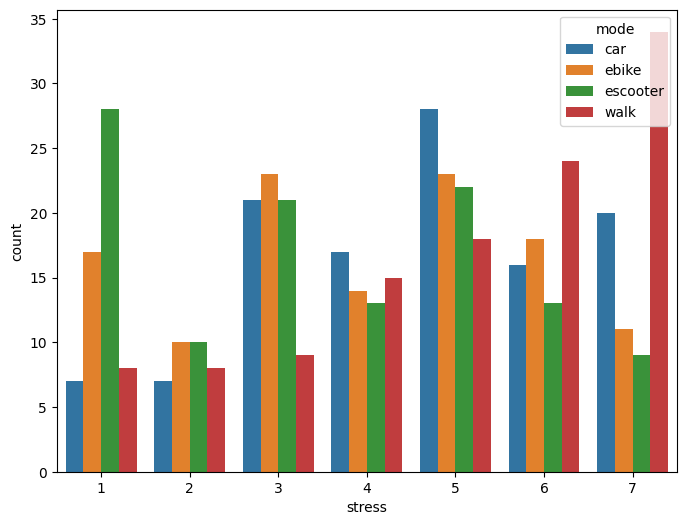

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x="stress", hue="mode", data=data1)
plt.show()